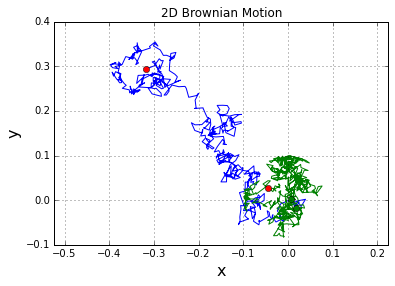

In [1]:
%matplotlib inline
from math import sqrt
import numpy as np
import pandas as pd
from pylab import plot, show, grid, axis, xlabel, ylabel, title, semilogx, xlim, ylim, hist
import track_analysis as ta

# Number of steps.
N = 500
# Time step size
dt = 0.04
# Total time.
T = N * dt
# frames per second
fps = 1/dt
# microns per pixel
mpp = 1
# diffusion coefficent of each particle
D = 0.001
# spatial dimensions
dims = 2 

# Initial values of x.
x = np.empty((2,N+1))
x[:, 0] = 0.0

num_particles = 10
particles = []
for p in range(num_particles):
    bx = ta.brownian(x[:,0], N, dt, D)
    bdf = pd.DataFrame()
    bdf["x"] = bx[0,:]
    bdf["y"] = bx[1,:]
    bdf["frame"] = np.arange(N)
    bdf["particle"] = np.ones(N)*(p+1)
#     cx = ta.confined_naive(x[:,0], N, dt, D, radius=0.05,dims=dims)
#     cdf = pd.DataFrame()
#     cdf["x"] = cx[0,:]
#     cdf["y"] = cx[1,:]
#     cdf["frame"] = np.arange(N)
#     cdf["particle"] = np.ones(N)*(p+1)
    particles.append(bdf)
#     particles.append(cdf)
brown_df = pd.concat(particles).reset_index(drop=True)

num_particles = 10
particles = []
for p in range(num_particles):
    cx = ta.confined_naive(x[:,0], N, dt, D, radius=0.1,dims=dims)
    cdf = pd.DataFrame()
    cdf["x"] = cx[0,:]
    cdf["y"] = cx[1,:]
    cdf["frame"] = np.arange(N)
    cdf["particle"] = np.ones(N)*(p+1)
    particles.append(cdf)
#     particles.append(cdf)
confined_df = pd.concat(particles).reset_index(drop=True)

# Plot the 2D trajectory.
plot(bx[0],bx[1])
plot(cx[0],cx[1])    
# Mark the start and end points.
plot(bx[0,0],bx[1,0], 'go')
plot(bx[0,-1], bx[1,-1], 'ro')
plot(cx[0,0],cx[1,0], 'go')
plot(cx[0,-1], cx[1,-1], 'ro')
# More plot decorations.
title('2D Brownian Motion')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
axis('equal')
grid(True)
show()

In [24]:
bsmss = ta.imss(brown_df,mpp,fps,100)
bsmss['gamma']

0    [-1.49182963843e-31, 0.488269778006, 1.0027253...
1    [-1.49182963843e-31, 0.519877091323, 1.0090232...
2    [-1.49182963843e-31, 0.555979156668, 1.0967248...
3    [-1.49182963843e-31, 0.544638855683, 1.0948312...
4    [-1.49182963843e-31, 0.49539474891, 0.98552627...
5    [-1.49182963843e-31, 0.489912629136, 0.9519857...
6    [-1.49182963843e-31, 0.454804063025, 0.9095651...
7    [-1.49182963843e-31, 0.394035073174, 0.8040913...
8    [-1.49182963843e-31, 0.555994024723, 1.0816242...
9    [-1.49182963843e-31, 0.563652528369, 1.1058628...
Name: gamma, dtype: object

In [34]:
csmss = ta.imss(confined_df,mpp,fps,100)

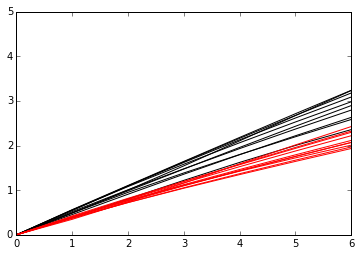

In [40]:
for b in bsmss.loc[:,['gamma']].values:
    plot(np.arange(7),b[0],'k-')

for c in csmss.loc[:,['gamma']].values:
    plot(np.arange(7),c[0],'r-')
ylim([0,5])
show()

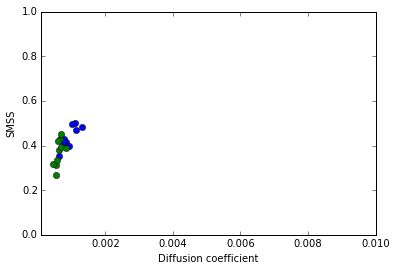

In [9]:
plot(bsmss["D2"],bsmss["smss"],'o')
plot(csmss["D2"],csmss["smss"],'o')
xlim([1e-4,1e-2])
ylim([0,1])
xlabel("Diffusion coefficient")
ylabel("SMSS")
show()

In [5]:
bmsd = ta.imsd(brown_df,mpp,fps,100)
diff = ta.linear_regress(bmsd,log=True)[0]['intercept']/4

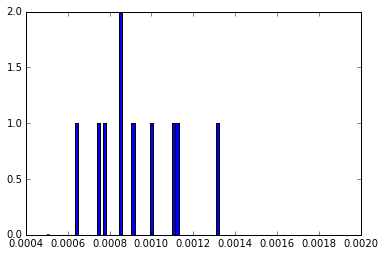

In [6]:
h = hist(diff.values,bins=100,range=(0.0005,0.002))

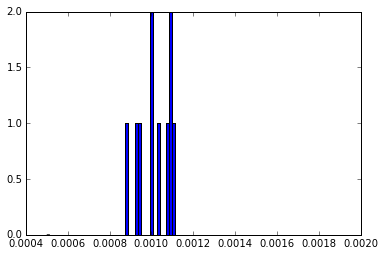

In [7]:
bmsd = ta.imsd(brown_df,mpp,fps,100)
diff = ta.linear_regress(bmsd,log=False,clip=4)[0]['slope']/4
h = hist(diff.values,bins=100,range=(0.0005,0.002))

(          slope     intercept  good
1   0.004376166 -2.384218e-05  True
2   0.003998507 -3.295018e-05  True
3   0.004347764 -1.794502e-05  True
4   0.003690664  1.299247e-05  True
5    0.00433976 -1.823131e-05  True
6   0.004438899 -2.096162e-05  True
7    0.00351298  2.894255e-05  True
8   0.004021032  -5.17732e-06  True
9   0.003753116  1.883187e-05  True
10  0.004127542  -7.02527e-06  True,                     1         2         3         4         5         6   \
lag time [s]                                                               
0.08         -0.000024 -0.000033 -0.000018  0.000013 -0.000018 -0.000021   
0.12         -0.000024 -0.000033 -0.000018  0.000013 -0.000018 -0.000021   
0.16         -0.000024 -0.000033 -0.000018  0.000013 -0.000018 -0.000021   
0.20         -0.000024 -0.000033 -0.000018  0.000013 -0.000018 -0.000021   

                    7         8         9         10  
lag time [s]                                          
0.08          0.000029 -0.000005  0

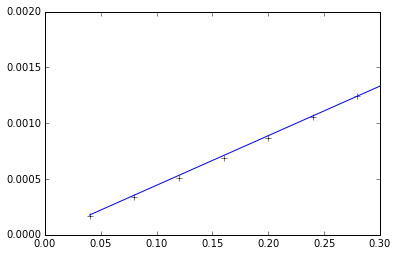

In [8]:
d = ta.linear_regress(bmsd,log=False,clip=4)
print d
idx = 6
plot(bmsd.index.values,bmsd[idx],'k+')
fit = bmsd.index.values*d[0]['slope'][idx]
plot(bmsd.index.values,fit)
ylim([0,0.002])
xlim([0,0.3])
show()